In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# B.1

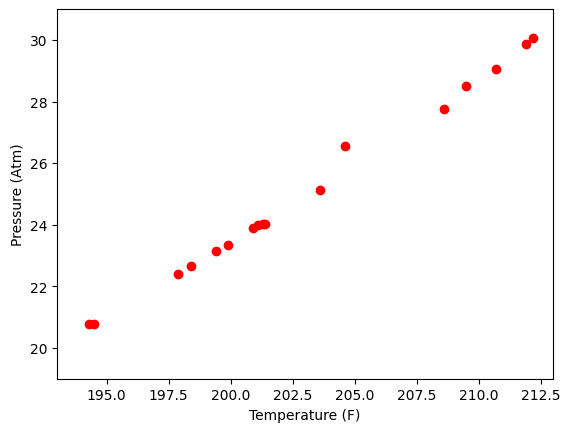

In [167]:
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w0=-81.06372713252819, w1=0.5228924008037078


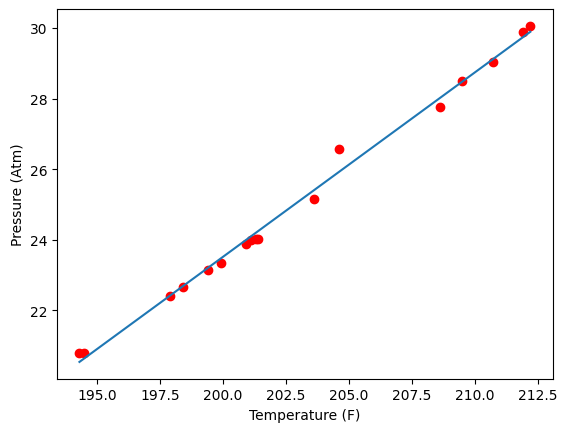

In [168]:
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=-1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
theta = np.dot(np.linalg.pinv(A), b).squeeze()

# prepare fitting line
w0, w1 = theta
x0 = np.linspace(np.min(X), np.max(X), 2)
y0 = w0 + w1 * x0
print(f'w0={w0}, w1={w1}')

# draw fitting line
plt.plot(X, y, 'ro')
plt.plot(x0, y0)
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

# B.2

In [ ]:
data = pd.read_csv('fuel.txt')
data['Fuel'] = 1000 * data['FuelC'] / data['Pop']
data['Dlic'] = 1000 * data['Drivers'] / data['Pop']
data['log(Miles)'] = np.log2(data['Miles'])
data.drop(['State', 'MPC', 'Miles', 'Drivers', 'FuelC', 'Pop'], inplace=True, axis=1)
data.head()

,Income,Tax,Fuel,Dlic,log(Miles)
0,23471,18.0,690.264418,1031.380067,16.527110
1,30064,8.0,514.279223,1031.641062,13.734286
2,25578,18.0,621.475071,908.597153,15.753556
3,22257,21.7,655.292668,946.570576,16.582436
4,32275,18.0,573.912855,844.703336,17.364708


In [79]:
X = data.drop(['Fuel'], axis=1)
y = data['Fuel']

Xbar = X.to_numpy()
Xbar = np.concatenate((np.ones((Xbar.shape[0],1)), Xbar), axis=1)

X_train = Xbar[:40]
X_test = Xbar[40:]
y_train = y[:40]
y_test = y[40:]

In [ ]:
lingres = LinearRegression(fit_intercept=False)
lingres.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
y_pred = lingres.predict(X_test)

print(f'MSE: {mean_squared_error(y_pred, y_test)}')
print(f'MAE: {mean_absolute_error(y_pred, y_test)}')
print(f'R2: {r2_score(y_test, y_pred)}')


MSE: 6253.362638614801
MAE: 60.61549039710617
R2: -0.0242295869677438


In [ ]:
data = pd.read_csv('fuel.txt')
data['Fuel'] = 1000 * data['FuelC'] / data['Pop']
data['Dlic'] = 1000 * data['Drivers'] / data['Pop']
data['log(Miles)'] = np.log2(data['Miles'])
data.drop(['State', 'MPC', 'Miles', 'Drivers', 'FuelC', 'Pop'], inplace=True, axis=1)
data.head()

X = data[['Income', 'Tax', 'Dlic', 'log(Miles)']].to_numpy()
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = data['Fuel'].to_numpy()

# train test split
X_train, X_test = train_test_split(Xbar, train_size=40, random_state=43)
y_train, y_test = train_test_split(y, train_size=40, random_state=43)

Using scikit-learn:

In [ ]:
# fit model
lingres = LinearRegression(fit_intercept=False)
lingres.fit(X_train, y_train)

# predict
y_pred = lingres.predict(X_test)

# evaluate
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 3995.403862184688
MAE: 47.412191261232664
R2: 0.44394017630502225


Using normal equation:

In [ ]:
pinv = np.linalg.pinv(np.dot(X_train.T, X_train))
Xy = np.dot(X_train.T, y_train)
theta = np.dot(pinv, Xy)

y_pred = np.dot(X_test, theta)

# evaluate
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 3995.403862137775
MAE: 47.41219126111496
R2: 0.44394017631155136


# B.3

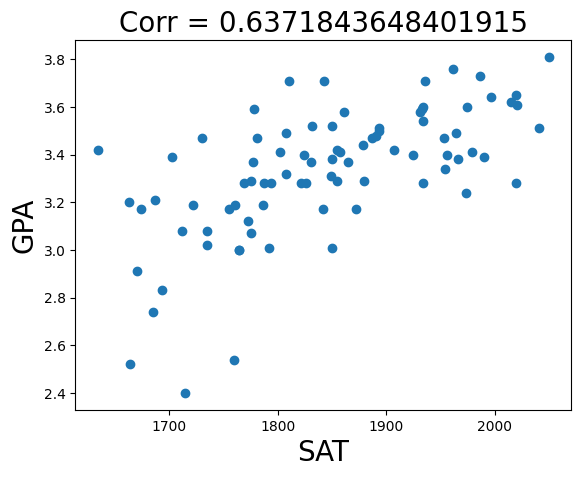

In [13]:
# Change to data path on your computer
data = pd.read_csv("SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.title(f'Corr = {data.corr().iloc[0,1]}', fontsize = 20)
plt.show()

(i) Corr = 0.6371843648401915


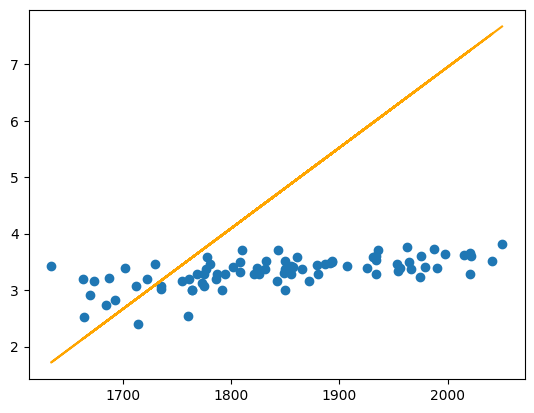

(iv):
	MSE: 6.407861545631991
	MAE: 2.297780234859251
	R2: -940.0870238848572


In [22]:
# (i) pearson correlation
corr = data.corr().iloc[0,1]
print(f'(i) Corr = {corr}')

# (ii) train test split
X = data['SAT'].to_numpy().reshape((-1,1))
X = np.concatenate((np.ones((len(X), 1)), X), axis=1)
y = data['GPA'].to_numpy()
X_train = X[:64]
X_test = X[64:]
y_train = y[:64]
y_test = y[64:]

# (iii) fit model
pinv = np.linalg.pinv(np.dot(X_train.T, X_train))
Xy = np.dot(X.T, y)
theta = np.dot(pinv, Xy)
y_h = theta[0] + theta[1] * x
plt.scatter(x, y)
plt.plot(x, y_h, c='orange')
plt.show()

# (iv)
y_pred = np.dot(X_test, theta)
print('(iv):')
print(f'\tMSE: {mean_squared_error(y_test, y_pred)}')
print(f'\tMAE: {mean_absolute_error(y_test, y_pred)}')
print(f'\tR2: {r2_score(y_test, y_pred)}') 

(v):
- Trong bài toán này, mô hình tuyến tính cho độ chính xác thấp hơn so với KNN
- Do mô hình tuyến tính có output không bị chặn nên các giá trị dự đoán có thể vượt ra ngoài khoảng giá trị của GPA

-> KNN phù hợp hơn so với mô hình tuyến tính

Cách khắc phục:

In [29]:
# Cách 1:
## Các giá trị < 0.0 được gán là 0.0
## Các giá trị > 4.0 được gán là 4.0
y_pred_sol1 = y_pred.copy()
y_pred_sol1[y_pred < 0.0] = 0.0
y_pred_sol1[y_pred > 4.0] = 4.0
print(f'\tMSE: {mean_squared_error(y_test, y_pred_sol1)}')
print(f'\tMAE: {mean_absolute_error(y_test, y_pred_sol1)}')
print(f'\tR2: {r2_score(y_test, y_pred_sol1)}') 

	MSE: 0.13782268897162264
	MAE: 0.35992785493000035
	R2: -19.241252602676262


In [27]:
# Cách 2: Dùng một hàm kích hoạt để nén output về khoảng [0, 4.0]
# Sử dụng hàm 4 / (1 + e^-x)

y_pred_sol2 = 4.0 / (1 + np.exp(-y_pred))
print(f'\tMSE: {mean_squared_error(y_test, y_pred_sol2)}')
print(f'\tMAE: {mean_absolute_error(y_test, y_pred_sol2)}')
print(f'\tR2: {r2_score(y_test, y_pred_sol2)}') 

	MSE: 0.13040856773413467
	MAE: 0.35190690405710745
	R2: -18.152381808508547


# B.4

a.

In [24]:
X = []
y = []

# read data
with open('vidu4_lin_reg.txt', 'r') as f:
    lines = f.readlines()
    header = lines[0].strip()
    attributes = header.split(' ')
    
    for line in lines[1:]:
        values = line.strip().split(' ')
        values = list(map(float, values))
        X.append(values[1:-1])
        y.append(values[-1])
Xbar = np.concatenate((np.ones((len(X), 1)), np.array(X)), axis=1)

# calculate theta
pinv = np.linalg.pinv(np.dot(Xbar.T, Xbar))
Xty = np.dot(Xbar.T, y)
theta = np.dot(pinv, Xty)
print(f'Coef: {theta}')

#evaluate
y_pred = np.dot(Xbar, theta)
print(f'MSE: {mean_squared_error(y, y_pred)}')
print(f'MAE: {mean_absolute_error(y, y_pred)}')
print(f'R2: {r2_score(y, y_pred)}')

Coef: [-0.10802908  0.00994694 -0.00020655  0.00218137  0.0076701   0.03847025]
MSE: 0.12777736265356218
MAE: 0.24594135299512043
R2: 0.2085197523952269


b.

In [26]:
# train test split
X_train = Xbar[:80]
X_test = Xbar[80:]
y_train = y[:80]
y_test = y[80:]

# fit model
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train)
print(f'Coef: {lin_reg.coef_}')

# evaluate
y_pred = lin_reg.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

# error
err = y_test - y_pred
print(f'E(epsilon)={np.mean(err)}')
print(f'Var(epsilon)={np.var(err)}')

Coef: [ 0.04306436  0.0089892  -0.00047742  0.00260218  0.00808634  0.00708535]
MSE: 0.22740099167615924
MAE: 0.3053259833743656
R2: 0.21453893938640278
E(epsilon)=0.07998861696197238
Var(epsilon)=0.22100281283267012


# B.5

In [44]:
data = pd.read_csv('real_estate.csv')
data.drop(['No'], inplace=True, axis=1)
data['X1 transaction date'] = np.trunc(data['X1 transaction date'])
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.0,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.0,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.0,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.0,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.0,5.0,390.56840,5,24.97937,121.54245,43.1


In [45]:
# train test split
X = data.iloc[:, :-1].to_numpy()
Xbar = np.concatenate((np.ones((len(X), 1)), X), axis=1)
y = data.iloc[:, -1].to_numpy()

X_train = Xbar[:350]
X_test = Xbar[350:]
y_train = y[:350]
y_test = y[350:]

Linear regression:

In [47]:
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train)
print(f'Coef: {lin_reg.coef_}')

# evaluate
y_pred = lin_reg.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Coef: [-1.08906135e+04  2.86647401e+00 -2.87179387e-01 -4.02217786e-03
  1.17396673e+00  2.65624222e+02 -1.20827541e+01]
MSE: 63.80695061605832
MAE: 6.032604707851197
R2: 0.6001833401130617


KNN:

In [49]:
def calculate_distance(value, X_train):
    dist = np.zeros(len(X_train))
    for i in range(len(X_train)):
        dist[i] = np.linalg.norm(value - X_train[i], ord=2)
    return dist

def find_nearest_indexes(value, X_train, k):
    dist = calculate_distance(value, X_train)
    return np.argsort(dist)[:k]

In [50]:
k = 18
y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexes = find_nearest_indexes(X_test[i], X_train, k)
    y_pred[i] = np.mean([y_train[idx] for idx in indexes])

# evaluate
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 43.89549238040122
MAE: 4.782552083333333
R2: 0.7249492574370462


- Phương pháp KNN với k=18 cho kết quả tốt hơn phương pháp hồi quy với chỉ số MSE, MAE đều thấp hơn và R2 cao hơn